# Prepare Humidity and Temperature Sensor Data 
## Deriving a new Target Variable from the time series data

In [1]:
import pandas as pd
import datetime
import string
from bokeh.io import show
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read column headings
with open ('/Users/stewarta/repos/iot-htsensor/data/columns.txt') as f:
    cols = f.readlines()
    
cols = [ln.strip() for ln in cols] 
print(cols)

# parse date and insert as new column
df.insert(1, 'datetime', pd.to_datetime(df.timestamp, errors='coerce')) # If ‘coerce’, then invalid parsing will be set as NaT
df.head()

df.set_index('datetime', inplace=True)
df.head()

['timestamp', 'Start Symbol', 'Zustand', 'Zeitstempel', 'Temp1', 'Temp2', 'Temp3', 'Temp4', 'Temp5', 'Temp6', 'Temp7', 'Temp8', 'Humi1', 'Humi2', 'Humi3', 'Humi4', 'Humi5', 'Humi6', 'Humi7', 'Humi8', 'Temperatur Kombisensor', 'Humid Kombisensor', 'Windgeschwindigkeit', 'Niederschlag', 'Rain', 'Stop Symbol']


,timestamp,Start Symbol,Zustand,Zeitstempel,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,...,Humi5,Humi6,Humi7,Humi8,Temperatur Kombisensor,Humid Kombisensor,Windgeschwindigkeit,Niederschlag,Rain,Stop Symbol
0,2013-04-14 07:44:23,$1,1,NaN,10.1,19.6,23.0,20.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2013-04-14 07:44:30,$1,1,NaN,10.1,19.6,23.0,20.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2013-04-14 07:45:37,$1,1,NaN,10.1,19.6,23.0,20.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2013-04-14 07:46:03,$1,1,NaN,10.1,19.6,23.0,20.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2013-04-14 07:46:19,$1,1,NaN,10.1,19.6,23.0,20.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


,timestamp,Temp1,Temp2,Temp3,Temp4,Temp8,Humi1,Humi2,Humi3,Humi4
datetime,,,,,,,,,,
2013-04-14 07:44:23,2013-04-14 07:44:23,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
2013-04-14 07:44:30,2013-04-14 07:44:30,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
2013-04-14 07:45:37,2013-04-14 07:45:37,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
2013-04-14 07:46:03,2013-04-14 07:46:03,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
2013-04-14 07:46:19,2013-04-14 07:46:19,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0


,timestamp,datetime,Temp1,Temp2,Temp3,Temp4,Temp8,Humi1,Humi2,Humi3,Humi4
0,2013-04-14 07:44:23,2013-04-14 07:44:23,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
1,2013-04-14 07:44:30,2013-04-14 07:44:30,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
2,2013-04-14 07:45:37,2013-04-14 07:45:37,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
3,2013-04-14 07:46:03,2013-04-14 07:46:03,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
4,2013-04-14 07:46:19,2013-04-14 07:46:19,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0


,timestamp,Temp1,Temp2,Temp3,Temp4,Temp8,Humi1,Humi2,Humi3,Humi4
datetime,,,,,,,,,,
2013-04-14 07:44:23,2013-04-14 07:44:23,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
2013-04-14 07:44:30,2013-04-14 07:44:30,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
2013-04-14 07:45:37,2013-04-14 07:45:37,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
2013-04-14 07:46:03,2013-04-14 07:46:03,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
2013-04-14 07:46:19,2013-04-14 07:46:19,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0


In [7]:
rs = df[['Temp1', 'Temp2', 'Temp3', 'Temp4', 
         'Humi1', 'Humi2', 'Humi3', 'Humi4']].resample('H').mean()
rs.head()

,Temp1,Temp2,Temp3,Temp4,Humi1,Humi2,Humi3,Humi4
datetime,,,,,,,,
2013-04-14 07:00:00,10.229167,19.600000,22.975000,20.200000,76.000000,42.000000,34.000000,40.000000
2013-04-14 08:00:00,11.390196,19.590196,23.028431,20.199020,75.460784,42.401961,34.392157,40.725490
2013-04-14 09:00:00,13.222772,19.518812,23.630693,20.179208,73.851485,43.000000,34.138614,41.000000
2013-04-14 10:00:00,14.580198,19.624752,23.916832,20.383168,73.049505,43.653465,34.415842,41.881188
2013-04-14 11:00:00,16.541748,19.560194,24.039806,20.441748,72.087379,45.203883,35.436893,42.970874


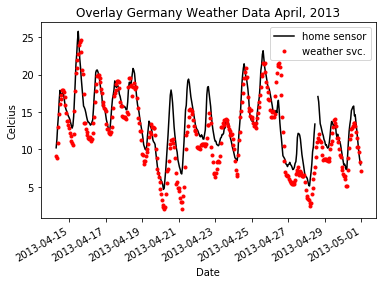

In [30]:
# overlay a sample of the Germany weather data with the home reading.

filter = (rs.index.year == 2013) & (rs.index.month == 4)
x = np.array(rs[filter].index)
y = np.array(rs[filter]['Temp1'])
y1 = np.array(rs[filter]['D_Temp'])
fig, ax = plt.subplots()
ax.set_title('Overlay Germany Weather Data April, 2013')
ax.plot(x, y, 'black', label = 'home sensor')
ax.plot(x, y1, '.', label='weather svc.', color = 'red')
fig.autofmt_xdate()
ax.set_xlabel('Date')
ax.set_ylabel('Celcius')
ax.legend(loc='best')

In [19]:
# align dwd with home 
rs = rs.join(dw[['D_Temp', 'D_Humi']],how='left')
rs.head()

,Temp1,Temp2,Temp3,Temp4,Humi1,Humi2,Humi3,Humi4,D_Temp,D_Humi
datetime,,,,,,,,,,
2013-04-14 07:00:00,10.229167,19.600000,22.975000,20.200000,76.000000,42.000000,34.000000,40.000000,9.1,76.0
2013-04-14 08:00:00,11.390196,19.590196,23.028431,20.199020,75.460784,42.401961,34.392157,40.725490,8.8,86.0
2013-04-14 09:00:00,13.222772,19.518812,23.630693,20.179208,73.851485,43.000000,34.138614,41.000000,10.9,81.0
2013-04-14 10:00:00,14.580198,19.624752,23.916832,20.383168,73.049505,43.653465,34.415842,41.881188,13.0,70.0
2013-04-14 11:00:00,16.541748,19.560194,24.039806,20.441748,72.087379,45.203883,35.436893,42.970874,14.8,66.0


In [17]:
# extract relevant columns and rename, subset
dw.rename(columns={'TT_TU':'D_Temp','RF_TU':'D_Humi'}, inplace=True)
dw.head()

,STATIONS_ID,MESS_DATUM,QN_9,D_Temp,D_Humi,eor
datetime,,,,,,
1951-01-01 01:00:00,662,1951010101,5,-7.9,94.0,eor
1951-01-01 02:00:00,662,1951010102,5,-7.1,93.0,eor
1951-01-01 03:00:00,662,1951010103,5,-6.2,92.0,eor
1951-01-01 04:00:00,662,1951010104,5,-5.9,91.0,eor
1951-01-01 05:00:00,662,1951010105,5,-5.8,91.0,eor


In [16]:
# create index
dw.set_index('datetime', inplace=True)
dw.head()

,STATIONS_ID,MESS_DATUM,QN_9,TT_TU,RF_TU,eor
datetime,,,,,,
1951-01-01 01:00:00,662,1951010101,5,-7.9,94.0,eor
1951-01-01 02:00:00,662,1951010102,5,-7.1,93.0,eor
1951-01-01 03:00:00,662,1951010103,5,-6.2,92.0,eor
1951-01-01 04:00:00,662,1951010104,5,-5.9,91.0,eor
1951-01-01 05:00:00,662,1951010105,5,-5.8,91.0,eor
